In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gold-prices/annual_csv.csv
/kaggle/input/gold-prices/monthly_csv.csv


In [2]:
from fbprophet import Prophet

**Monthly Forecast**

In [3]:
df = pd.read_csv('/kaggle/input/gold-prices/monthly_csv.csv')
df.head()
# rename columns
df.columns = ['ds', 'y']
df.head()

,ds,y
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [4]:
m = Prophet()
m.fit(df)

In [5]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1207,2021-06-27
1208,2021-06-28
1209,2021-06-29
1210,2021-06-30
1211,2021-07-01


In [6]:
forcast = m.predict(future)
forcast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1207,2021-06-27,1697.819005,1517.741356,1857.157937
1208,2021-06-28,1701.581845,1531.825468,1864.294234
1209,2021-06-29,1705.604151,1531.139312,1879.536211
1210,2021-06-30,1709.948420,1538.945098,1877.706474
1211,2021-07-01,1714.675430,1543.854609,1882.968592


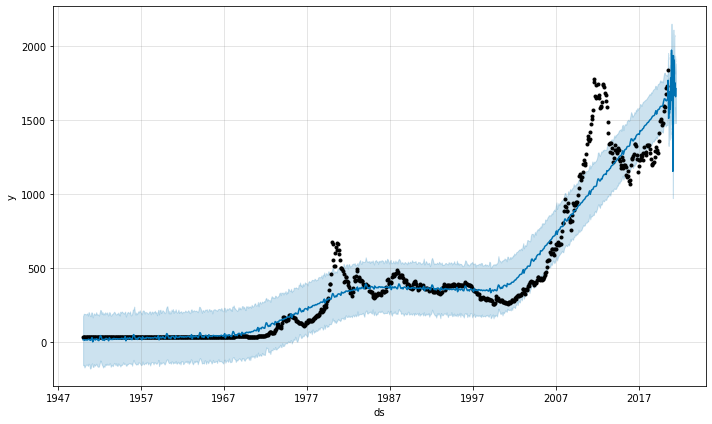

In [7]:
fig1 = m.plot(forcast)

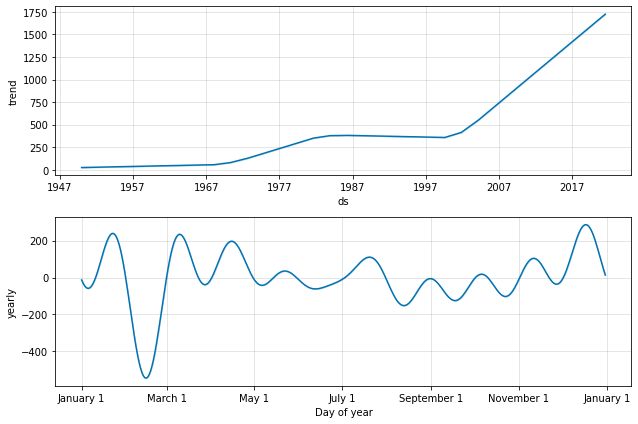

In [8]:
fig2 = m.plot_components(forcast)

In [9]:
from fbprophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forcast)

In [10]:
plot_components_plotly(m, forcast)

**Yearly Forecast**

In [11]:
dfy=pd.read_csv('/kaggle/input/gold-prices/annual_csv.csv')
# rename columns
dfy.columns = ['ds', 'y']
dfy.head()

,ds,y
0,1950-12,34.72
1,1951-12,34.66
2,1952-12,34.79
3,1953-12,34.85
4,1954-12,35.04


In [12]:
my=Prophet()
my.fit(dfy)

In [13]:
future_y = my.make_future_dataframe(periods=365)
future_y.tail()

,ds
430,2020-11-26
431,2020-11-27
432,2020-11-28
433,2020-11-29
434,2020-11-30


In [14]:
forecast_y = my.predict(future_y)
forecast_y[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
430,2020-11-26,2368.092669,2058.007566,2689.565857
431,2020-11-27,1920.979248,1616.912467,2224.852431
432,2020-11-28,1556.845297,1253.989578,1860.540901
433,2020-11-29,1285.393035,988.905961,1599.153688
434,2020-11-30,1113.737090,803.612836,1413.476022


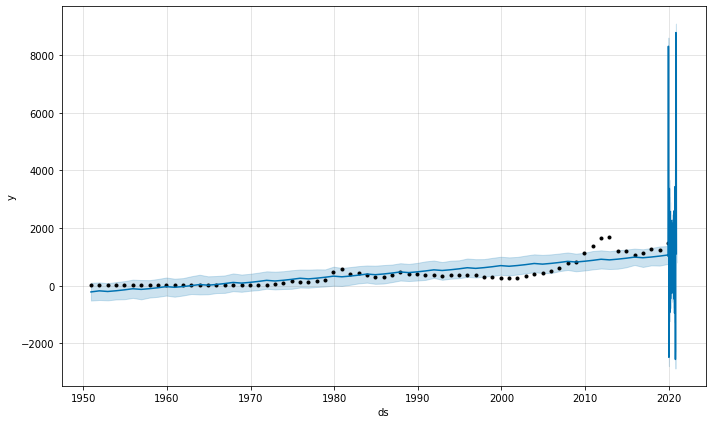

In [15]:
fig3 = my.plot(forecast_y)

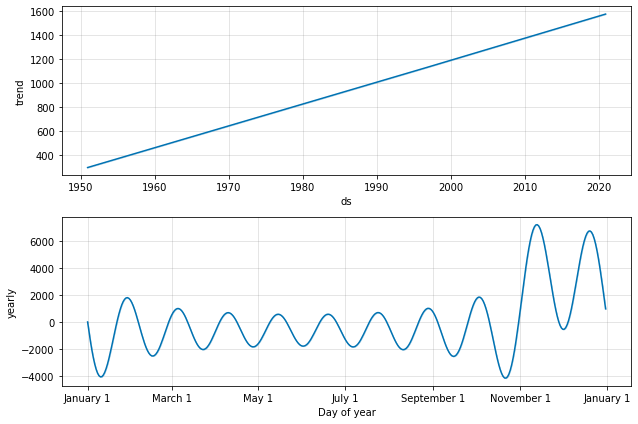

In [16]:
fig4 = my.plot_components(forecast_y)

In [17]:
plot_plotly(my, forecast_y)

In [18]:
plot_components_plotly(my, forecast_y)